Introduction to Tensors

https://www.tensorflow.org/guide/tensor

Introduction to Variables

https://www.tensorflow.org/guide/variable

Introduction to gradients and automatic differentiation

https://www.tensorflow.org/guide/autodiff


In [ ]:
# These are all the necessary imports
import pandas as pd
import numpy as np
import os
import time
import math
import random
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from pandas import DataFrame as df
from numpy import linalg as LA
from matplotlib.ticker import MultipleLocator
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses, callbacks
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

# Data Importing

In [ ]:
# Reads in the font files
font1 = pd.read_csv('COURIER.csv')
font2 = pd.read_csv('CALIBRI.csv')
font3 = pd.read_csv('LUCIDA.csv')
font4 = pd.read_csv('SITKA.csv')
font5 = pd.read_csv('TIMES.csv')

In [ ]:
# Drops the unecessary features of the font data sets.  Keeps only "font", "strength", "italic" and the pixel gray scales
keep = [0,3,4] + list(range(12,412))
font1 = font1.iloc[:,keep]
font2 = font2.iloc[:,keep]
font3 = font3.iloc[:,keep]
font4 = font4.iloc[:,keep]
font5 = font5.iloc[:,keep]

# Filters the fonts to keep only the non-bold and non-italic characters
font1 = font1[(font1['strength']==0.4) & (font1['italic']==0)]
font2 = font2[(font2['strength']==0.4) & (font2['italic']==0)]
font3 = font3[(font3['strength']==0.4) & (font3['italic']==0)]
font4 = font4[(font4['strength']==0.4) & (font4['italic']==0)]
font5 = font5[(font5['strength']==0.4) & (font5['italic']==0)]

In [ ]:
print(font1.shape)
print(font2.shape)
print(font3.shape)
print(font4.shape)
print(font5.shape)

(4262, 403)
(4768, 403)
(3794, 403)
(4500, 403)
(4805, 403)


In [ ]:
print(font1)

         font  strength  italic  r0c0  ...  r19c16  r19c17  r19c18  r19c19
0     COURIER       0.4       0     1  ...       1       1       1       1
1     COURIER       0.4       0     1  ...      34      26      22      22
2     COURIER       0.4       0     1  ...      64      45      30      23
3     COURIER       0.4       0     1  ...       1       1       1       1
4     COURIER       0.4       0   255  ...     255     255      86       1
...       ...       ...     ...   ...  ...     ...     ...     ...     ...
4257  COURIER       0.4       0     1  ...      31       9       1       1
4258  COURIER       0.4       0     1  ...       1       1       1       1
4259  COURIER       0.4       0     1  ...       1       1       1       1
4260  COURIER       0.4       0   255  ...     134       1       1       1
4261  COURIER       0.4       0     1  ...     255      47      13      13

[4262 rows x 403 columns]


# Exploring Pixel Images

In [ ]:
# Creates the X portion of each font and reshapes them to 20x20.  This section is done specifically for pixel images. 
font1_XX = font1.iloc[:,3:].to_numpy().reshape(font1.shape[0], 20, 20)
font2_XX = font2.iloc[:,3:].to_numpy().reshape(font2.shape[0], 20, 20)
font3_XX = font3.iloc[:,3:].to_numpy().reshape(font3.shape[0], 20, 20)
font4_XX = font4.iloc[:,3:].to_numpy().reshape(font4.shape[0], 20, 20)
font5_XX = font5.iloc[:,3:].to_numpy().reshape(font5.shape[0], 20, 20)

<function matplotlib.pyplot.show>

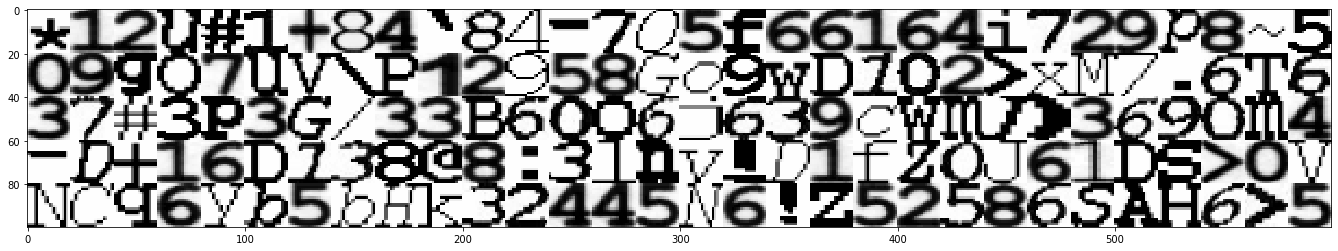

In [ ]:
# Exploring font images (small view, 150 images at a time)

box = font1_XX # change to font1_XX, font2_XX, etc. to view different fonts
cox = 0 # change the index.  
dox = 30
for i in range(dox):
  if i == 0:
    fox1 = np.concatenate((box[cox], box[(cox+1)], box[(cox+2)], box[(cox+3)], box[(cox+4)]))
  else:
    fox2 = np.concatenate((box[(cox+i*5)], box[(cox+i*5+1)], box[(cox+i*5+2)], box[(cox+i*5+3)], box[(cox+i*5+4)]))
    fox1 = np.hstack((fox1, fox2))

plt.figure(figsize = (100,4))
plt.imshow((fox1), cmap='Greys', interpolation='nearest')
plt.show

<function matplotlib.pyplot.show>

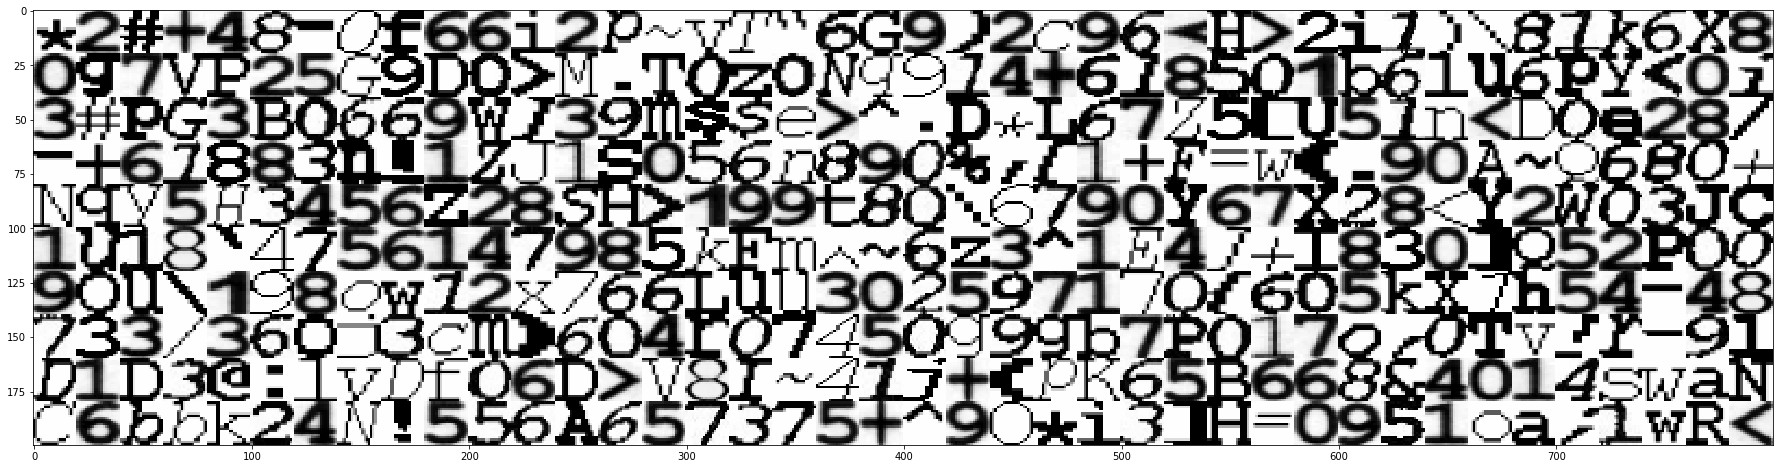

In [ ]:
# Exploring font images (large view, 400 images at a time)

box = font1_XX # change to font1_XX, font2_XX, etc. to view different fonts
cox = 0 # change the index.  Go by intervals of 400
dox = 40
for i in range(dox):
  if i == 0:
    fox1 = np.concatenate((box[cox], box[(cox+1)], box[(cox+2)], box[(cox+3)], box[(cox+4)], box[(cox+5)], box[(cox+6)], box[(cox+7)], box[(cox+8)], box[(cox+9)]))
  else:
    fox2 = np.concatenate((box[(cox+i*10)], box[(cox+i*10+1)], box[(cox+i*10+2)], box[(cox+i*10+3)], box[(cox+i*10+4)], box[(cox+i*10+5)], box[(cox+i*10+6)], box[(cox+i*10+7)], box[(cox+i*10+8)], box[(cox+i*10+9)]))
    fox1 = np.hstack((fox1, fox2))

plt.figure(figsize = (100,8))
plt.imshow((fox1), cmap='Greys', interpolation='nearest')
plt.show

<function matplotlib.pyplot.show>

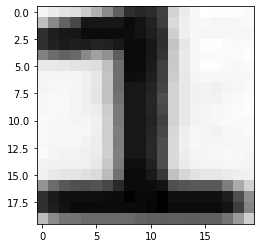

In [ ]:
plt.figure()
plt.imshow((font1_XX[1010]), cmap='Greys', interpolation='nearest')
plt.show
# box1[955] is a "1".  So are 976, 1010, 1034
# "3" is font 1- 2, font 2- 399, font 3- 709 , font 4-829 , font 5- 988
# "G" is font 1- 32, font 2- 364, font 3-252 , font 4- 711 , font 5- 841
# "0" is font 1- 1, font 2- 402, font 3- 712 , font 4- 832, font 5- 949,1046
# '6' is font 1- 19, font 2-396 , font 3- 706  , font 4-826 , font 5- 990
# 'a' is font 1- 388 , font 2-387, font 3- 935, font 4- 1016, font 5- 2961
# 'B' - font1_XX[52], font2_XX[1427], font3_XX[1057], font4_XX[264], font5_XX[455]

In [ ]:
# Effectively asks if two images are identical
sum(sum(font1_XX[955] == font1_XX[976])) == 400

True

# Creating X & Y Test & Train sets

In [ ]:
# Creates the X portion of each font and reshapes them to 1x20x20.  This is done so that the X input is the right shape for the Conv2D layer
font1_X = font1.iloc[:,3:].to_numpy().reshape(font1.shape[0], 20, 20, 1)
font2_X = font2.iloc[:,3:].to_numpy().reshape(font2.shape[0], 20, 20, 1)
font3_X = font3.iloc[:,3:].to_numpy().reshape(font3.shape[0], 20, 20, 1)
font4_X = font4.iloc[:,3:].to_numpy().reshape(font4.shape[0], 20, 20, 1)
font5_X = font5.iloc[:,3:].to_numpy().reshape(font5.shape[0], 20, 20, 1)

# Creates the Y portion of each font.  No need to do one hot encoding. 
#font1_Y = np.array([[1,0,0,0,0]]*font1_X.shape[0])
#font2_Y = np.array([[0,1,0,0,0]]*font2_X.shape[0])
#font3_Y = np.array([[0,0,1,0,0]]*font3_X.shape[0])
#font4_Y = np.array([[0,0,0,1,0]]*font4_X.shape[0])
#font5_Y = np.array([[0,0,0,0,1]]*font5_X.shape[0])

# Creating Y portion of each font Weiquang's way.  Do one hot encoding after making Ytrain & Ytest
font1_Y = np.array([[0]]*font1_X.shape[0])
font2_Y = np.array([[1]]*font2_X.shape[0])
font3_Y = np.array([[2]]*font3_X.shape[0])
font4_Y = np.array([[3]]*font4_X.shape[0])
font5_Y = np.array([[4]]*font5_X.shape[0])

# Creating the TRAIN and TEST sets for each font
font1_Ytrain, font1_Ytest, font1_Xtrain, font1_Xtest = train_test_split(font1_Y, font1_X, train_size=0.8, random_state= 7)
font2_Ytrain, font2_Ytest, font2_Xtrain, font2_Xtest = train_test_split(font2_Y, font2_X, train_size=0.8, random_state= 7)
font3_Ytrain, font3_Ytest, font3_Xtrain, font3_Xtest = train_test_split(font3_Y, font3_X, train_size=0.8, random_state= 7)
font4_Ytrain, font4_Ytest, font4_Xtrain, font4_Xtest = train_test_split(font4_Y, font4_X, train_size=0.8, random_state= 7)
font5_Ytrain, font5_Ytest, font5_Xtrain, font5_Xtest = train_test_split(font5_Y, font5_X, train_size=0.8, random_state= 7)

# # Creating the final TRAIN and TEST sets
Xtrain = np.vstack((font1_Xtrain, font2_Xtrain, font3_Xtrain, font4_Xtrain, font5_Xtrain))
Xtest = np.vstack((font1_Xtest, font2_Xtest, font3_Xtest, font4_Xtest, font5_Xtest))
Ytrain = np.concatenate((font1_Ytrain, font2_Ytrain, font3_Ytrain, font4_Ytrain, font5_Ytrain))
Ytest = np.concatenate((font1_Ytest, font2_Ytest, font3_Ytest, font4_Ytest, font5_Ytest))

Ytest = to_categorical(Ytest, 5)
Ytrain = to_categorical(Ytrain, 5)

# Normalizing the X data
Xtrain=Xtrain/255
Xtest=Xtest/255

# Changing the dtype to 'uint8' because that's what it is in Weiquang's example. 
Xtrain = Xtrain.astype('uint8')  
Xtest = Xtest.astype('uint8')

print(Xtrain.shape, "   ", Xtrain.dtype, "  ", type(Xtrain))
print(Xtest.shape,  "   ", Xtest.dtype, "  ", type(Xtest))
print(Ytrain.shape, "   ", Ytrain.dtype, "  ", type(Ytrain))
print(Ytest.shape,  "   ", Ytest.dtype, "  ", type(Ytest))

(17702, 20, 20, 1)     uint8    <class 'numpy.ndarray'>
(4427, 20, 20, 1)     uint8    <class 'numpy.ndarray'>
(17702, 5)     float32    <class 'numpy.ndarray'>
(4427, 5)     float32    <class 'numpy.ndarray'>


# Built in functions

In [ ]:
# Function to train NN, returns dictionary with the Monitor history, model summary and model runtime.
# If model_save is 'yes' then dictionary also saves the model of the last epoch.
def train_model(Xtrain, Ytrain,
                turn_dropout_on = 'no',
                H_value = 90,
                epoch = 100,
                save_model = ['no','model_name'],
                batch = round((Xtrain.shape[0])**0.5)):
  
  model_moniter = {}
  #### Creating the model ####
  model = Sequential()
  # Conv1
  model.add(Conv2D(16, (5, 5), padding='valid', input_shape= Xtrain.shape[1:])) # Number of paramters = ((5x5)+1)*16
  model.add(Activation('relu'))
  # Maxpool1
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Conv2
  model.add(Conv2D(16, (3, 3), padding='valid')) # Number of paramters = ((3x3)*16+1)*16
  model.add(Activation('relu'))
  # Maxpool2
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Flatten
  model.add(Flatten())
  # Hidden
  model.add(Dense(H_value))
  if turn_dropout_on == 'yes':
    model.add(Dropout(0.5)) # Dropout Layer, turn on to use
  model.add(Activation('relu'))
  # Output
  model.add(Dense(5))
  model.add(Activation('softmax'))

  model_moniter['model_summary'] = model.summary()

  #### Compiling the model ####
  opt = Adam(lr=0.001, decay=1e-7)

  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  
  # checkpointer = ModelCheckpoint(filepath='/content/model_1', monitor='val_accuracy', save_best_only=True)

  #### Running the model to check losses for stopping ####
  start = time.process_time()
  with tf.device('/gpu:0'):
    Monitor = model.fit(Xtrain, Ytrain,
                  batch_size=batch,
                  epochs=epoch,
                  validation_data=(Xtest, Ytest),
                  # callbacks = [checkpointer],
                  shuffle = True)
    if save_model[0] == 'yes':
      model.save(save_model[1])
      model_moniter['model'] = load_model(save_model[1])
  model_time = (time.process_time() - start)

  #### Adding to the dictionary the model history and run time. ####
  model_moniter['run_time'] = (f"Time to run model with H = {H_value}: {model_time//60} minutes {model_time%60} seconds")
  model_moniter['History'] = Monitor.history

  return(model_moniter)

In [ ]:
# Plot the loss and acc plot
def plot_loss_and_acc(train_loss, val_loss, train_acc, val_acc, title1 = 'C.E. Loss Plot', title2 = 'Accuracy Plot'):
  fig = plt.figure(figsize= (15,4))
  ax1 = fig.add_subplot(1,2,1)
  # Train & Test Loss plot
  plt.plot(range(1,(len(train_loss)+1)), train_loss, color='dodgerblue', linewidth=1, markersize=6) # Train Loss
  plt.plot(range(1,(len(train_loss)+1)), val_loss, color='red', linewidth=1, markersize=6) # Test Loss
  plt.xlabel('epoch #')
  plt.ylabel('Cross-Entropy Value')
  plt.title(title1)
  plt.legend(['Train Loss', 'Test Loss'])

  ax1 = fig.add_subplot(1,2,2)
  # Train & Test Accuracy plot
  plt.plot(range(1,(len(train_acc)+1)), train_acc, color='dodgerblue', linewidth=1, markersize=6) # Train Loss
  plt.plot(range(1,(len(train_acc)+1)), val_acc, color='red', linewidth=1, markersize=6) # Test Loss
  plt.xlabel('epoch #')
  plt.ylabel('Accuracy Value')
  plt.title(title2)
  plt.legend(['Train Acc', 'Test Acc']);

In [ ]:
# Function to plot confution matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    fig, ax = plt.subplots(figsize=(16,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap,vmin=0,vmax=100)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), size = 14,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
def confmat_percent(confmat):
  conf_percent = (confmat.astype('float') / confmat.sum(axis=1)[:, np.newaxis])*100
  conf_percent_df= pd.DataFrame(conf_percent)
  conf_percent_df.columns=['CL1','CL2','CL3','CL4','CL5']
  conf_percent_df.index= ['CL1','CL2','CL3','CL4','CL5']
  return conf_percent_df

def confmat_df(confmat):
  conf_df= pd.DataFrame(confmat)
  conf_df.columns=['CL1','CL2','CL3','CL4','CL5']
  conf_df.index= ['CL1','CL2','CL3','CL4','CL5']
  conf_df['Sum']= confmat.sum(axis=1)
  return conf_df

In [ ]:
def confidence_interval(cv,confmat):
  cv= cv
  Ntest_CL1= confmat.loc['CL1']['Sum']    #sum of test CL1 values
  Ntest_CL2= confmat.loc['CL2']['Sum']    #sum of test CL2 values
  Ntest_CL3= confmat.loc['CL3']['Sum']    #sum of test CL3 values
  Ntest_CL4= confmat.loc['CL4']['Sum']
  Ntest_CL5= confmat.loc['CL5']['Sum']
  ptest_CL1= (confmat.loc['CL1']['CL1'])/Ntest_CL1
  ptest_CL2= (confmat.loc['CL2']['CL2'])/Ntest_CL2
  ptest_CL3= (confmat.loc['CL3']['CL3'])/Ntest_CL3
  ptest_CL4= (confmat.loc['CL4']['CL4'])/Ntest_CL4
  ptest_CL5= (confmat.loc['CL5']['CL5'])/Ntest_CL5


  #CI for CL1 
  sigma_test_CL1= math.sqrt(ptest_CL1*(1-ptest_CL1)/Ntest_CL1) 
  lower_test_CL1= (ptest_CL1-(cv*sigma_test_CL1))*100
  upper_test_CL1= (ptest_CL1 + (cv*sigma_test_CL1))*100
  #CI for CL2
  sigma_test_CL2= math.sqrt(ptest_CL2*(1-ptest_CL2)/Ntest_CL2) 
  lower_test_CL2= (ptest_CL2-(cv*sigma_test_CL2))*100
  upper_test_CL2= (ptest_CL2 + (cv*sigma_test_CL2))*100

  #CI for CL3
  sigma_test_CL3= math.sqrt(ptest_CL3*(1-ptest_CL3)/Ntest_CL3) 
  lower_test_CL3= (ptest_CL3-(cv*sigma_test_CL3))*100
  upper_test_CL3= (ptest_CL3 + (cv*sigma_test_CL3))*100

  #CI for CL4
  sigma_test_CL4= math.sqrt(ptest_CL4*(1-ptest_CL4)/Ntest_CL4) 
  lower_test_CL4= (ptest_CL4-(cv*sigma_test_CL4))*100
  upper_test_CL4= (ptest_CL4 + (cv*sigma_test_CL4))*100

  #CI for CL5
  sigma_test_CL5= math.sqrt(ptest_CL5*(1-ptest_CL5)/Ntest_CL5) 
  lower_test_CL5= (ptest_CL5-(cv*sigma_test_CL5))*100
  upper_test_CL5= (ptest_CL5 + (cv*sigma_test_CL5))*100

  # Overall CI
  N1= confmat['Sum'].sum()
  diag_sum= np.trace(confmat)
  p1= diag_sum/N1
  sigma_p1= math.sqrt(p1*(1-p1)/N1)
  lower_limit= (p1-(cv*sigma_p1))*100
  upper_limit= (p1+(cv*sigma_p1))*100


  CI_data= {'Class':['CL1','CL2','CL3','CL4','CL5','Overall'],
            'Lower Limit':[lower_test_CL1, lower_test_CL2, lower_test_CL3, lower_test_CL4, lower_test_CL5, lower_limit],
            'Upper Limit': [upper_test_CL1, upper_test_CL2, upper_test_CL3, upper_test_CL4, upper_test_CL5, upper_limit]}

  CI_table= pd.DataFrame(CI_data, columns=['Class','Lower Limit','Upper Limit'])

  return(CI_table.round(2))

In [ ]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [ ]:
# Function for Hidden Layer Anlysis

# Explanation of arguments
# "my_cases" is a set of training cases.  Can be Xtrain or font1_Xtrain/255, etc.
# "blurb" is just a print statement saying what classes have been used.
# "model_to_use" is self explanatory
# "layer_to_use" is an integer representing the nth layer in the model.  Assumes zero indexing. 
def HLA(my_cases, model_to_use, blurb='For...', layer_to_use = 9):
  model = model_to_use
  for i in range(0,(layer_to_use+1)):
    if i == 0:
      aa = model.layers[i](my_cases.astype('float'))
    else:
      aa = model.layers[i](aa)
  ACTn = np.mean(aa.numpy(), axis=1)
  avact = round(sum(ACTn)/len(ACTn), 4)
  per_1half = round((sum(ACTn < avact/2)/len(ACTn))*100, 4)
  per_1third = round((sum(ACTn < avact/3)/len(ACTn))*100, 4)
  print(blurb)
  print("   The average activity of the neurons in the hidden layer is " + str(avact))
  print("   per(1/2): " + str(per_1half))
  print("   per(1/3): " + str(per_1third))
  print("\n")
  print(ACTn.shape)
  print(my_cases.shape)

  # Plots the histogram of ACTn
  fig = plt.figure()
  plt.figure(figsize=(9,5))
  plt.hist(ACTn, bins=list(np.array(list(range(0,20)))/50))
  plt.axvline(x=avact, color = 'red')
  plt.ylabel('Frequency', fontsize=16)
  plt.xlabel('Activity Level', fontsize=16)
  plt.title('Histogram of Average Neuron States in Hidden Layer')
  #plt.xticks([.4, .425, .45, .475, .5, .525, .55, .575, .6])

In [ ]:
def Class_Responder(my_classes, model, layer_to_use = 9): 
  # my_classes = a tuple of your class fonts
  # layer_to_use = an interger representing the hidden layer in your model.  assume zero indexing. 
  my_h = model.layers[layer_to_use].output_shape[1]
  n = len(my_classes)
  def ACTN_CLASS(CLX, LAYER = layer_to_use): # returns the mean of the hidden layer neuron activities for cases fed in.
    for i in range(0,(LAYER+1)):
      if i == 0:
        aa = model.layers[i](CLX.astype('float'))
      else:
        aa = model.layers[i](aa)
    return np.mean(aa.numpy(), axis=0)

  for i in range(n): 
    if i == 0:
      goober = ACTN_CLASS(my_classes[i])
    else:
      goober = np.vstack((goober, ACTN_CLASS(my_classes[i])))

  Responder = [] # A list indicating which class causes the most "activation" in each neuron.
  for i in range(my_h):
    fox = np.where(goober[:,i]==np.max(goober[:,i]))[0][0] + 1
    Responder.append(fox)
  
  # Creates a data frame of the class responders
  L1, L2 = [], []
  for i in range(n):
    L1.append(('Class ' + str(i+1)))
    L2.append(sum(np.array(Responder)==(i+1)))
  kooky = pd.DataFrame({'category': L1, 'number': L2})
  kooky.set_index('category', inplace=True)
  kooky.sort_values('number', inplace=True, ascending=False)

  # Plots the histogram of class responders
  fig = plt.figure()
  plt.figure(figsize=(7,5))
  kooky.plot(y='number', kind='bar', legend=False)
  plt.ylabel('Frequency', fontsize=16)
  plt.title('Histogram of Class Responders in Hidden Layer', fontsize=16)
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 14)
  for i in range(n):
    plt.text((i-0.15), kooky.iloc[i], str(kooky.iloc[i]['number']), color='black', fontweight='bold', fontsize = 14)

# Training and testing for 3 H values
---

In [ ]:
# Use GPU to accelerate the training time
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## CNN with H=90

### No dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'no',
        H_value = 90,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 16)        416       
_________________________________________________________________
activation_12 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_13 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 90: 1.0 minutes 10.919882249000011 seconds'

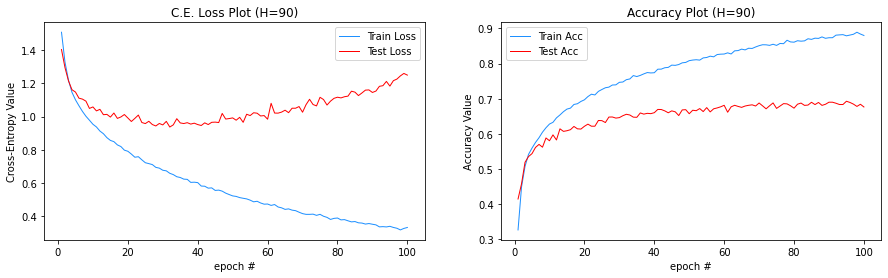

In [ ]:
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=90)',
                  title2 = 'Accuracy Plot (H=90)')
# Probably stop ~40 epochs as it starts to stabalize there.

### Dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 90,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 16, 16, 16)        416       
_________________________________________________________________
activation_16 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_17 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 90: 1.0 minutes 10.541827286 seconds'

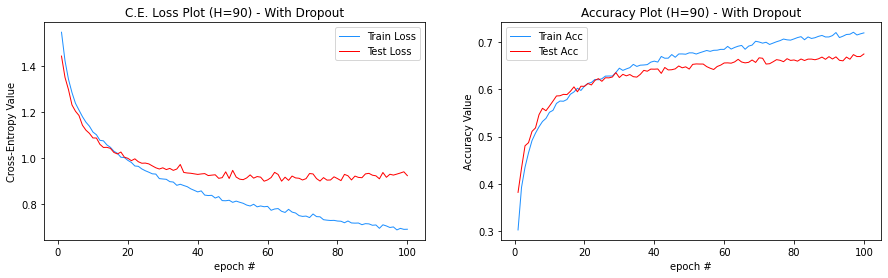

In [ ]:
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=90) - With Dropout',
                  title2 = 'Accuracy Plot (H=90) - With Dropout')
# Probably stop ~40 epochs as it starts to stabalize there.

### Best epoch confusion matrix
Will select best between the two as the model with dropout layer with ~40 epochs. They both seem to have similar loss but ig dropout helps prevent overfitting in the future.

In [ ]:
model1 = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 90,
        epoch = 40,
        save_model = ['yes','model.h90'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 16, 16, 16)        416       
_________________________________________________________________
activation_8 (Activation)    (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_9 (Activation)    (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)              

In [ ]:
model1['model'].evaluate(Xtest,Ytest)
y_pred_test = model1['model'].predict(Xtest)
predlabel_test = np.argmax(y_pred_test,axis=1)
Ytest_true= np.argmax(Ytest,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm_h90= confusion_matrix(Ytest_true, predlabel_test); print(cm_h90)

139/139 [==============================] - 0s 2ms/step - loss: 0.9404 - accuracy: 0.6393
[[576 113  37  35  92]
 [ 39 731  82  66  36]
 [ 56 264 277  87  75]
 [ 23  86  53 673  65]
 [123  98  46 121 573]]


Normalized confusion matrix


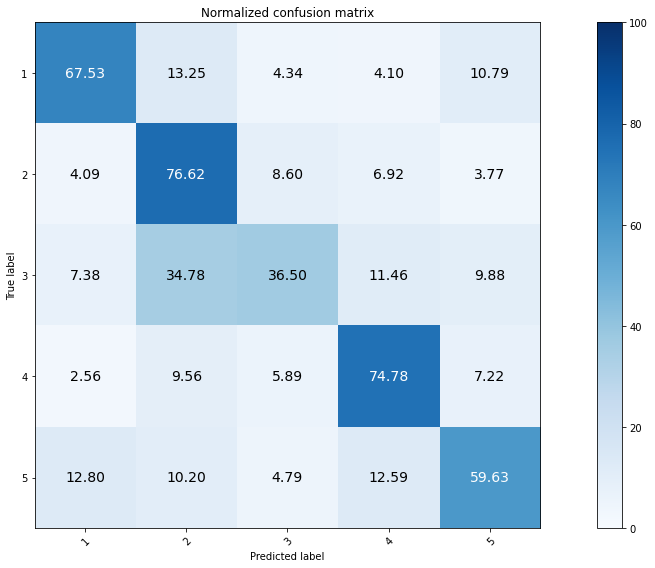

Global acc is: 63.926


In [ ]:
plot_confusion_matrix(Ytest_true, predlabel_test, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Global acc is:', round(accuracy_score(Ytest_true, predlabel_test)*100,3))

In [ ]:
# Simple Confmat for comparison at end
confmat_percent(cm_h90).round(2)

In [ ]:
# Confidence Interval (if needed)
cm_h90_df= confmat_df(cm_h90)
cv= 1.96  # 95% CI= 1.96 and 90% CI= 1.6
CI_h90= confidence_interval(cv,cm_h90_df); #Testing CI

## CNN with H=150

### No dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'no',
        H_value = 150,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_20 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_21 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 150: 1.0 minutes 12.224590589999991 seconds'

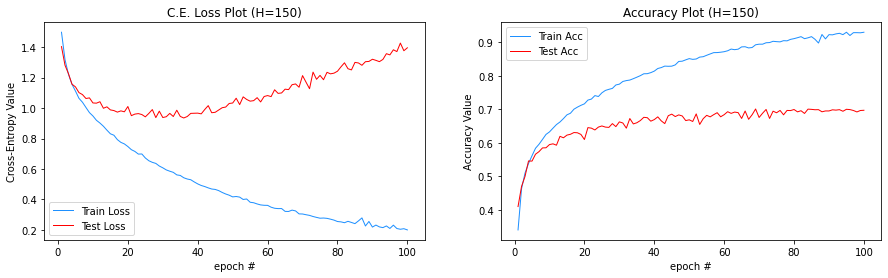

In [ ]:
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=150)',
                  title2 = 'Accuracy Plot (H=150)')
# Probably stop ~20 epochs as it starts to stabalize there and then overfit after.

### Dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 150,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_24 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_25 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 150: 1.0 minutes 12.860527819000026 seconds'

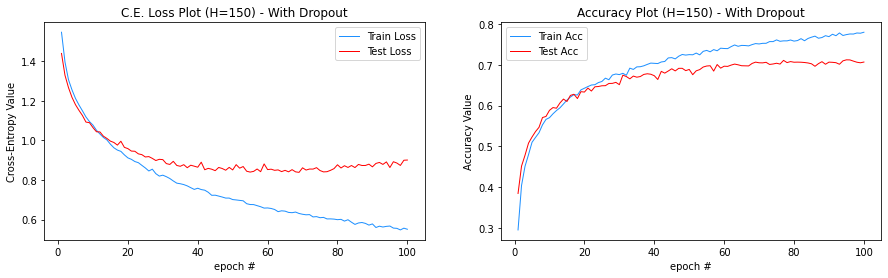

In [ ]:
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=150) - With Dropout',
                  title2 = 'Accuracy Plot (H=150) - With Dropout')
# Probably stop ~45 epochs as it starts to stabalize there.

### Best epoch confusion matrix
Will select best between the two as the model with dropout layer with ~45 epochs. They both seem to have similar loss but ig dropout helps prevent overfitting in the future.

In [ ]:
model150 = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 150,
        epoch = 45,
        save_model = ['yes','model.h150'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_20 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_21 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 144)              

In [ ]:
model150['model'].evaluate(Xtest,Ytest)
y_pred_test = model150['model'].predict(Xtest)
predlabel_test = np.argmax(y_pred_test,axis=1)
Ytest_true= np.argmax(Ytest,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm_h150= confusion_matrix(Ytest_true, predlabel_test); cm_h150

139/139 [==============================] - 0s 2ms/step - loss: 0.8887 - accuracy: 0.6673


array([[558,  78,  43,  23, 151],
       [ 56, 669, 119,  52,  58],
       [ 59, 161, 350,  77, 112],
       [ 24,  48,  73, 659,  96],
       [ 63,  53,  39,  88, 718]])

Normalized confusion matrix


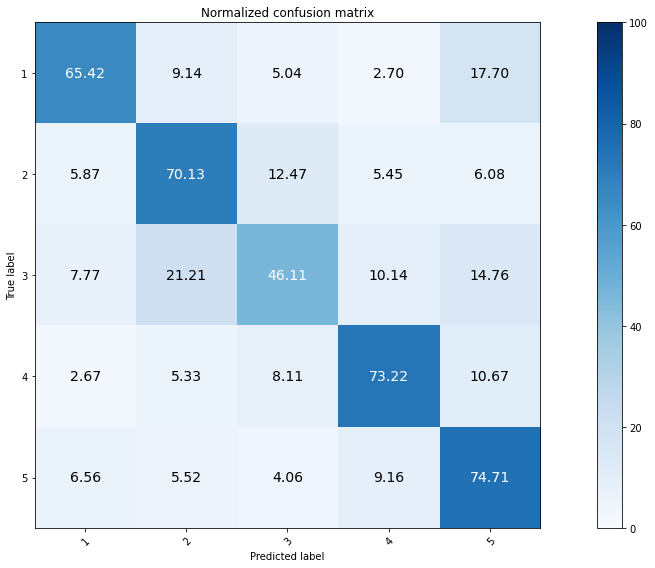

Global acc is: 66.727


In [ ]:
plot_confusion_matrix(Ytest_true, predlabel_test, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Global acc is:', round(accuracy_score(Ytest_true, predlabel_test)*100,3))

In [ ]:
# Simple Confmat for comparison at end
confmat_percent(cm_h150).round(2)

In [ ]:
# Confidence Interval (if needed)
cm_h150_df= confmat_df(cm_h150)
cv= 1.96  # 95% CI= 1.96 and 90% CI= 1.6
CI_h150= confidence_interval(cv,cm_h150_df) #Testing CI


## CNN with H=200

### No dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'no',
        H_value = 200,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_28 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_29 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 200: 1.0 minutes 12.519632401000024 seconds'

Time to run model with H = 200: 1.0 minutes 5.600378786000007 seconds


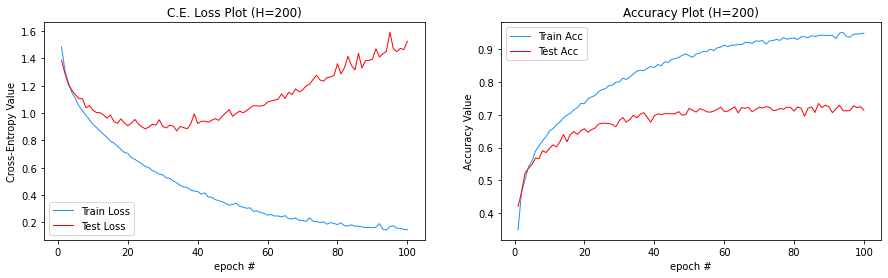

In [ ]:
print(model['run_time'])
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=200)',
                  title2 = 'Accuracy Plot (H=200)')
# Probably stop ~25 epochs as it starts to stabalize there and then overfit after.

### Dropout layer training

In [ ]:
model = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 200,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_32 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_33 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 144)              

In [ ]:
model['run_time']

'Time to run model with H = 200: 1.0 minutes 14.177435444000025 seconds'

Time to run model with H = 200: 1.0 minutes 3.507490930000003 seconds


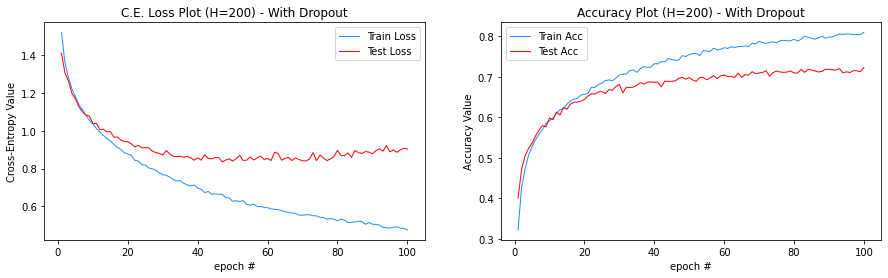

In [ ]:
print(model['run_time'])
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=200) - With Dropout',
                  title2 = 'Accuracy Plot (H=200) - With Dropout')
# Probably stop at ~40 epochs as it starts to stabalize there.

### Best epoch confusion matrix
Will select best between the two as the model with dropout layer with ~40 epochs. They both seem to have similar loss but ig dropout helps prevent overfitting in the future.

In [ ]:
model200 = train_model(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 200,
        epoch = 40,
        save_model = ['yes','model.h200'],
        batch = round((Xtrain.shape[0])**0.5))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        416       
_________________________________________________________________
activation (Activation)      (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

In [ ]:
model200['model'].evaluate(Xtest,Ytest)
y_pred_test = model200['model'].predict(Xtest)
predlabel_test = np.argmax(y_pred_test,axis=1)
Ytest_true= np.argmax(Ytest,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm_h200= confusion_matrix(Ytest_true, predlabel_test); cm_h200

139/139 [==============================] - 1s 3ms/step - loss: 0.8645 - accuracy: 0.6754


array([[602,  78,  48,  15, 110],
       [ 45, 721, 113,  36,  39],
       [ 53, 199, 345,  67,  95],
       [ 15,  74,  77, 637,  97],
       [ 90,  70,  55,  61, 685]])

Normalized confusion matrix


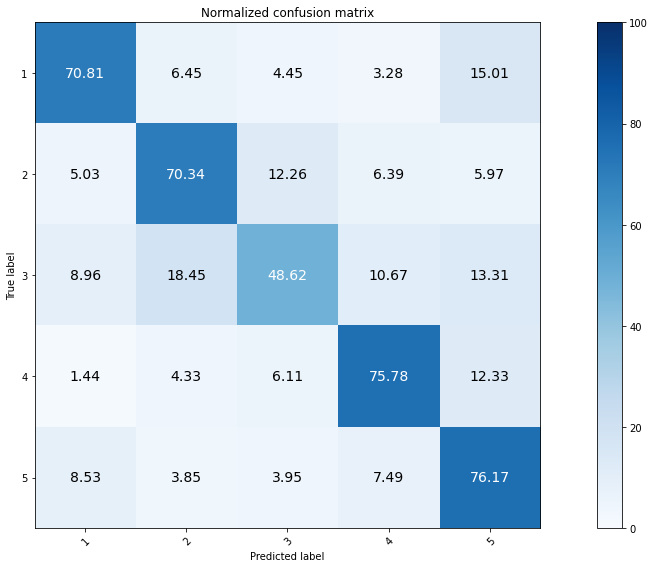

Global acc is: 69.076


In [ ]:
plot_confusion_matrix(Ytest_true, predlabel_test, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Global acc is:', round(accuracy_score(Ytest_true, predlabel_test)*100,3))

In [ ]:
model200['model'].evaluate(Xtrain,Ytrain)
y_pred_train = model200['model'].predict(Xtrain)
predlabel_train = np.argmax(y_pred_train,axis=1)
Ytrain_true= np.argmax(Ytrain,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm_h200_train= confusion_matrix(Ytrain_true, predlabel_train)

554/554 [==============================] - 1s 2ms/step - loss: 0.5784 - accuracy: 0.7923


Normalized confusion matrix


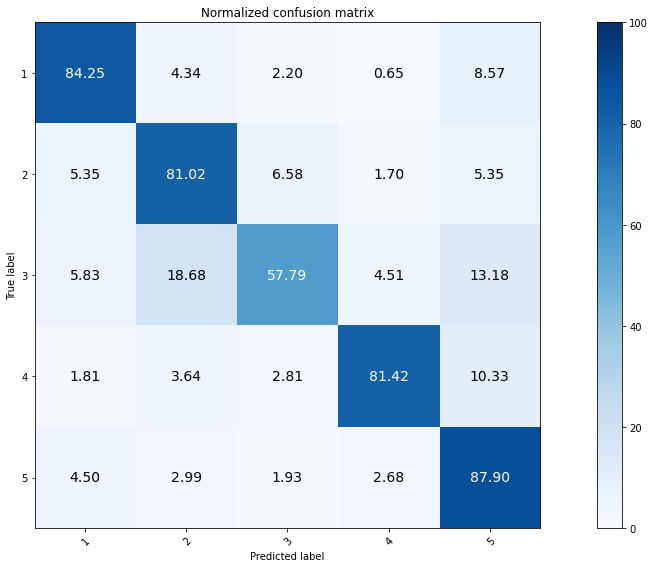

In [ ]:
# Training Confusion Matrix
plot_confusion_matrix(Ytrain_true, predlabel_train, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
# Simple Confmat for comparison at end
confmat_percent(cm_h200).round(2)

In [ ]:
# Confidence Interval (if needed)- Testset
cm_h200_df= confmat_df(cm_h200)
cv= 1.96  # 95% CI= 1.96 and 90% CI= 1.6
CI_h200= confidence_interval(cv,cm_h200_df) #Testing CI

In [ ]:
# Confidence Interval - Trainset
cm_h200_train_df= confmat_df(cm_h200_train)
cv= 1.96  # 95% CI= 1.96 and 90% CI= 1.6
CI_h200_train= confidence_interval(cv,cm_h200_train_df)

In [ ]:
display_side_by_side(CI_h200,CI_h200_train_df,
                     titles=['Testset CI','Trainset CI'])

NameError: ignored

In [ ]:
display_side_by_side(confmat_percent(cm_h90).round(1),
                     confmat_percent(cm_h150).round(1),
                     confmat_percent(cm_h200).round(1),
                     titles=['For h=90','For h=150', 'For h=200'])

,CL1,CL2,CL3,CL4,CL5
CL1,67.5,13.2,4.3,4.1,10.8
CL2,4.1,76.6,8.6,6.9,3.8
CL3,7.4,34.8,36.5,11.5,9.9
CL4,2.6,9.6,5.9,74.8,7.2
CL5,12.8,10.2,4.8,12.6,59.6
,CL1,CL2,CL3,CL4,CL5
CL1,65.4,9.1,5.0,2.7,17.7
CL2,5.9,70.1,12.5,5.5,6.1
CL3,7.8,21.2,46.1,10.1,14.8
CL4,2.7,5.3,8.1,73.2,10.7


In [ ]:
display_side_by_side(CI_h90,CI_h150,CI_h200,
                     titles=['For h=90','For h=150', 'For h=200'])

,Class,Lower Limit,Upper Limit
0,CL1,64.38,70.67
1,CL2,73.94,79.31
2,CL3,33.07,39.92
3,CL4,71.94,77.62
4,CL5,56.52,62.73
5,Overall,62.51,65.34
,Class,Lower Limit,Upper Limit
0,CL1,62.22,68.61
1,CL2,67.22,73.03
2,CL3,42.57,49.66


# Exploring convolutional layers

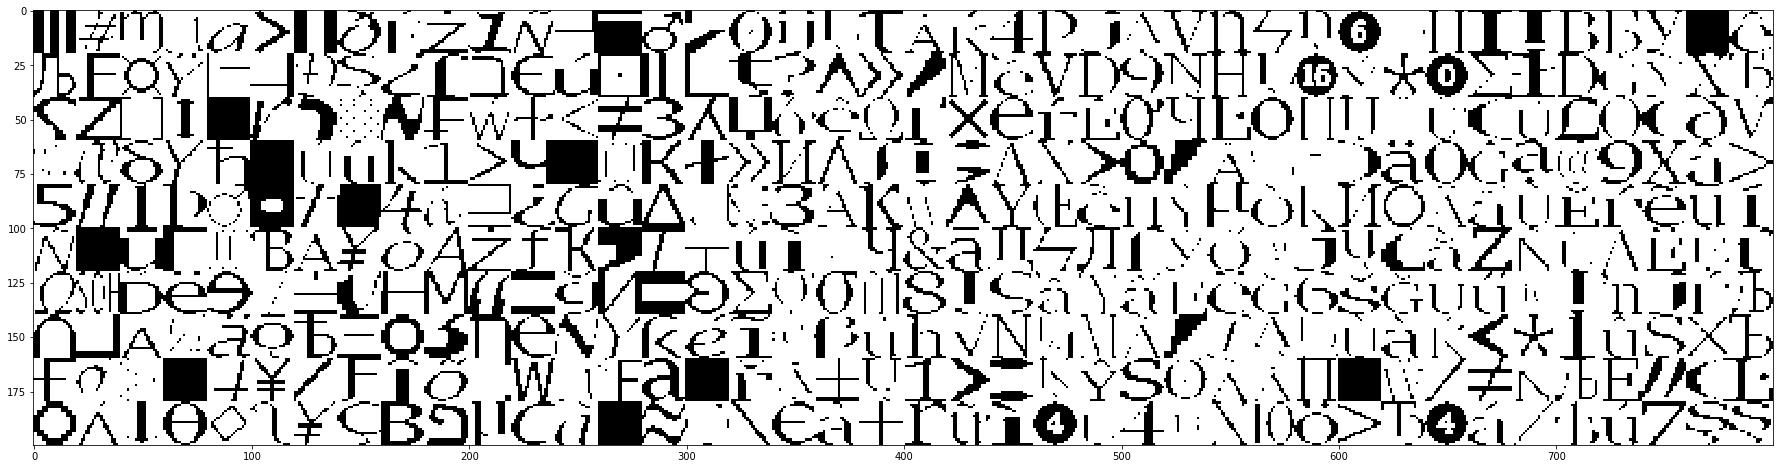

In [ ]:
# Exploring font images (large view, 400 images at a time)

box = Xtest.squeeze() # change to font1_XX, font2_XX, etc. to view different fonts
cox = 2400 # change the index.  Go by intervals of 400
dox = 40
for i in range(dox):
  if i == 0:
    fox1 = np.concatenate((box[cox], box[(cox+1)], box[(cox+2)], box[(cox+3)], box[(cox+4)], box[(cox+5)], box[(cox+6)], box[(cox+7)], box[(cox+8)], box[(cox+9)]))
  else:
    fox2 = np.concatenate((box[(cox+i*10)], box[(cox+i*10+1)], box[(cox+i*10+2)], box[(cox+i*10+3)], box[(cox+i*10+4)], box[(cox+i*10+5)], box[(cox+i*10+6)], box[(cox+i*10+7)], box[(cox+i*10+8)], box[(cox+i*10+9)]))
    fox1 = np.hstack((fox1, fox2))

plt.figure(figsize = (100,8))
plt.imshow((fox1), cmap='Greys', interpolation='nearest')
plt.show;

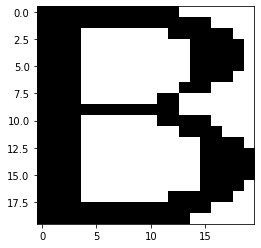

In [ ]:
plt.figure()
plt.imshow((Xtest).squeeze()[2489], cmap='Greys', interpolation='nearest') #748,1822
plt.show;

In [ ]:
# model200=load_model('model.h200')

In [ ]:
convlayer1 = model200['model'].layers[0](Xtest.astype('float32')) # Had to convert the input to float32 for this to work.
# convlayer1 = model200.layers[0](Xtest.astype('float32')) # Had to convert the input to float32 for this to work.

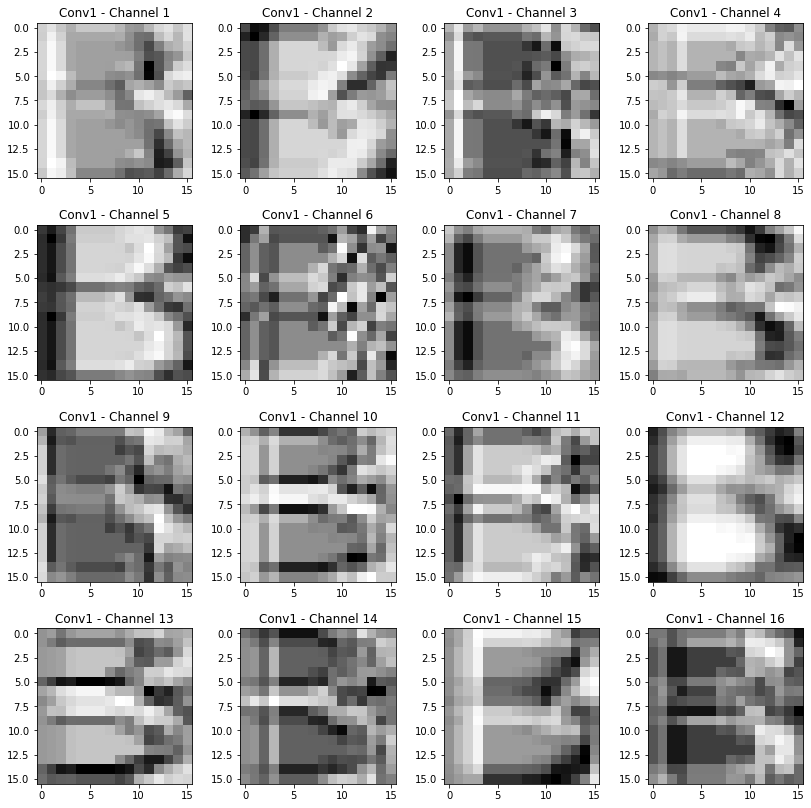

In [ ]:
fig,axes = plt.subplots(4, 4, figsize=(14, 14))
for i,x,y in zip(range(16),np.concatenate([([i]*4) for i in [0,1,2,3]], axis=0),list(range(4))*4):
    axes[x,y].imshow(convlayer1[2489,:,:,i], cmap='Greys', interpolation='nearest')
    axes[x,y].set_title(f'Conv1 - Channel {i+1}')
    plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
# Getting more states of the layers
activation_l1 = model200['model'].layers[1](convlayer1)
maxpool_l1 = model200['model'].layers[2](activation_l1)
convlayer2 = model200['model'].layers[3](maxpool_l1)
activation_l2 = model200['model'].layers[4](convlayer2)
maxpool_l2 = model200['model'].layers[5](activation_l2)
flatten_layer = model200['model'].layers[6](maxpool_l2)

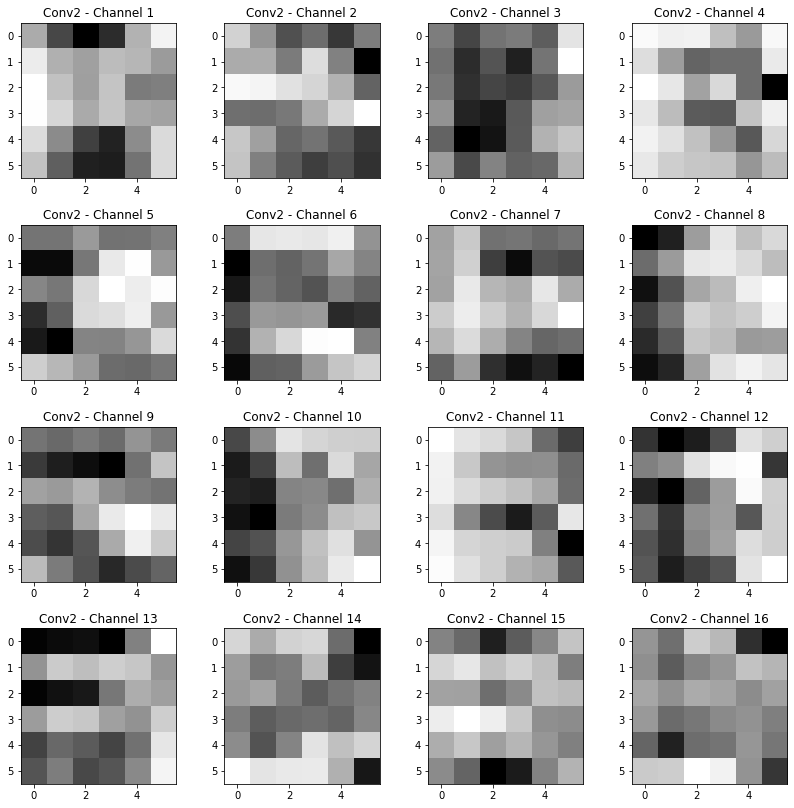

In [ ]:
fig,axes = plt.subplots(4, 4, figsize=(14, 14))
for i,x,y in zip(range(16),np.concatenate([([i]*4) for i in [0,1,2,3]], axis=0),list(range(4))*4):
    axes[x,y].imshow(convlayer2[2489,:,:,i], cmap='Greys', interpolation='nearest')
    axes[x,y].set_title(f'Conv2 - Channel {i+1}')
    plt.subplots_adjust(hspace=0.3)
plt.show()

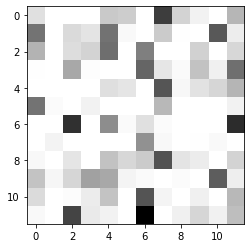

In [ ]:
flatten_layer_r = tf.reshape(flatten_layer,(4427,12,12))
plt.imshow(flatten_layer_r[2489], cmap='Greys', interpolation='nearest')
plt.show()

# Attempts at Improvement

## Adding padding
Changed the padding parameter in the cnn layers to "same" instead of "valid"

In [ ]:
# Function to train NN, returns dictionary with the Monitor history, model summary and model runtime.
# If model_save is 'yes' then dictionary also saves the model of the last epoch.
def train_newmodel(Xtrain, Ytrain,
                turn_dropout_on = 'no',
                H_value = 90,
                epoch = 100,
                save_model = ['no','model_name'],
                batch = round((Xtrain.shape[0])**0.5)):
  
  model_moniter = {}
  #### Creating the model ####
  model = Sequential()
  # Conv1
  model.add(Conv2D(16, (5, 5), padding='same', input_shape= Xtrain.shape[1:])) # Number of paramters = ((5x5)+1)*16
  model.add(Activation('relu'))
  # Maxpool1
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Conv2
  model.add(Conv2D(16, (3, 3), padding='same')) # Number of paramters = ((3x3)*16+1)*16
  model.add(Activation('relu'))
  # Maxpool2
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Flatten
  model.add(Flatten())
  # Hidden
  model.add(Dense(H_value))
  if turn_dropout_on == 'yes':
    model.add(Dropout(0.5)) # Dropout Layer, turn on to use
  model.add(Activation('relu'))
  # Output
  model.add(Dense(5))
  model.add(Activation('softmax'))

  model_moniter['model_summary'] = model.summary()

  #### Compiling the model ####
  opt = Adam(lr=0.001, decay=1e-7)

  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  
  # checkpointer = ModelCheckpoint(filepath='/content/model_1', monitor='val_accuracy', save_best_only=True)

  #### Running the model to check losses for stopping ####
  start = time.process_time()
  with tf.device('/gpu:0'):
    Monitor = model.fit(Xtrain, Ytrain,
                  batch_size=batch,
                  epochs=epoch,
                  validation_data=(Xtest, Ytest),
                  # callbacks = [checkpointer],
                  shuffle = True)
    if save_model[0] == 'yes':
      model.save(save_model[1])
      model_moniter['model'] = load_model(save_model[1])
  model_time = (time.process_time() - start)

  #### Adding to the dictionary the model history and run time. ####
  model_moniter['run_time'] = (f"Time to run model with H = {H_value}: {model_time//60} minutes {model_time%60} seconds")
  model_moniter['History'] = Monitor.history

  return(model_moniter)

In [ ]:
model = train_newmodel(Xtrain, Ytrain,
        turn_dropout_on = 'yes',
        H_value = 200,
        epoch = 100,
        save_model = ['no','model_name'],
        batch = 2*round((Xtrain.shape[0])**0.5))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 20, 20, 16)        416       
_________________________________________________________________
activation_36 (Activation)   (None, 20, 20, 16)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
activation_37 (Activation)   (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)              

Time to run model with H = 200: 0.0 minutes 39.370543561999966 seconds


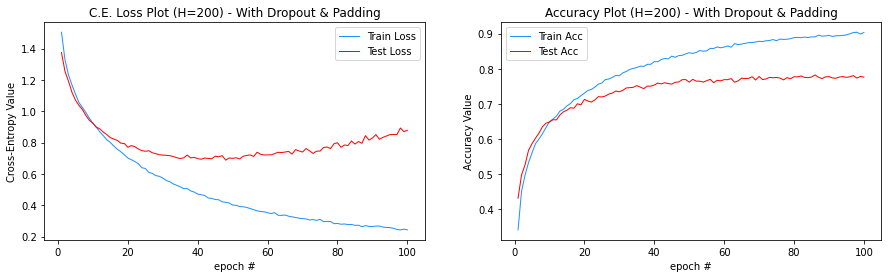

In [ ]:
print(model['run_time'])
plot_loss_and_acc(model['History']['loss'], model['History']['val_loss'],
                  model['History']['accuracy'], model['History']['val_accuracy'],
                  title1 = 'C.E. Loss Plot (H=200) - With Dropout & Padding',
                  title2 = 'Accuracy Plot (H=200) - With Dropout & Padding')
# Probably stop at ~25 epochs as it starts to stabalize there.

In [ ]:
model200_pad = train_newmodel(Xtrain, Ytrain,
                turn_dropout_on = 'yes',
                H_value = 200,
                epoch = 35,
                save_model = ['yes','model.h200padding'],
                batch = round((Xtrain.shape[0])**0.5))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 20, 20, 16)        416       
_________________________________________________________________
activation_8 (Activation)    (None, 20, 20, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)              

In [ ]:
model200_pad['model'].evaluate(Xtest,Ytest)
y_pred_test = model200_pad['model'].predict(Xtest)
predlabel_test = np.argmax(y_pred_test,axis=1)
Ytest_true= np.argmax(Ytest,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm_h200_pad= confusion_matrix(Ytest_true, predlabel_test); cm_h200_pad

139/139 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.7628


array([[665,  40,  40,  10,  98],
       [ 34, 717, 134,  29,  40],
       [ 46, 117, 479,  39,  78],
       [  9,  14,  64, 747,  66],
       [ 77,  24,  43,  48, 769]])

Normalized confusion matrix


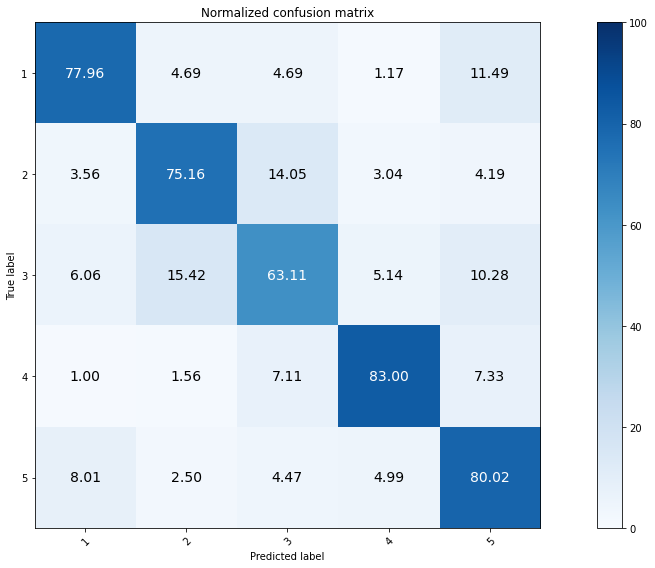

Global acc is: 76.282


In [ ]:
plot_confusion_matrix(Ytest_true, predlabel_test, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Global acc is:', round(accuracy_score(Ytest_true, predlabel_test)*100,3))

In [ ]:
convlayer1 = model200_pad['model'].layers[0](Xtest.astype('float32')) # Had to convert the input to float32 for this to work.

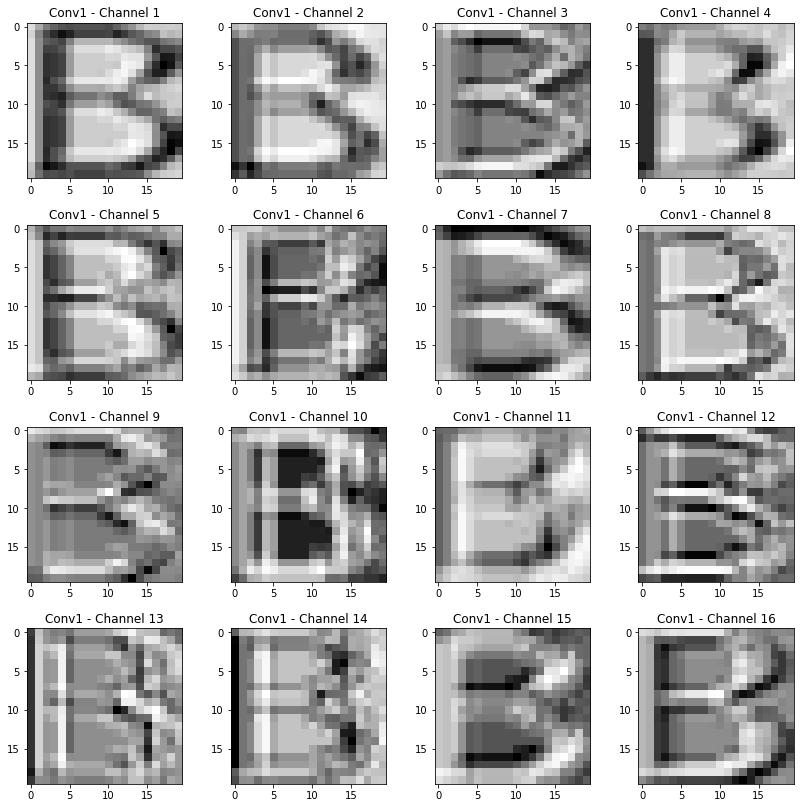

In [ ]:
fig,axes = plt.subplots(4, 4, figsize=(14, 14))
for i,x,y in zip(range(16),np.concatenate([([i]*4) for i in [0,1,2,3]], axis=0),list(range(4))*4):
    axes[x,y].imshow(convlayer1[2489,:,:,i], cmap='Greys', interpolation='nearest')
    axes[x,y].set_title(f'Conv1 - Channel {i+1}')
    plt.subplots_adjust(hspace=0.3)
plt.show()

In [ ]:
# Getting more states of the layers
activation_l1 = model200_pad['model'].layers[1](convlayer1)
maxpool_l1 = model200_pad['model'].layers[2](activation_l1)
convlayer2 = model200_pad['model'].layers[3](maxpool_l1)
activation_l2 = model200_pad['model'].layers[4](convlayer2)
maxpool_l2 = model200_pad['model'].layers[5](activation_l2)
flatten_layer = model200_pad['model'].layers[6](maxpool_l2)

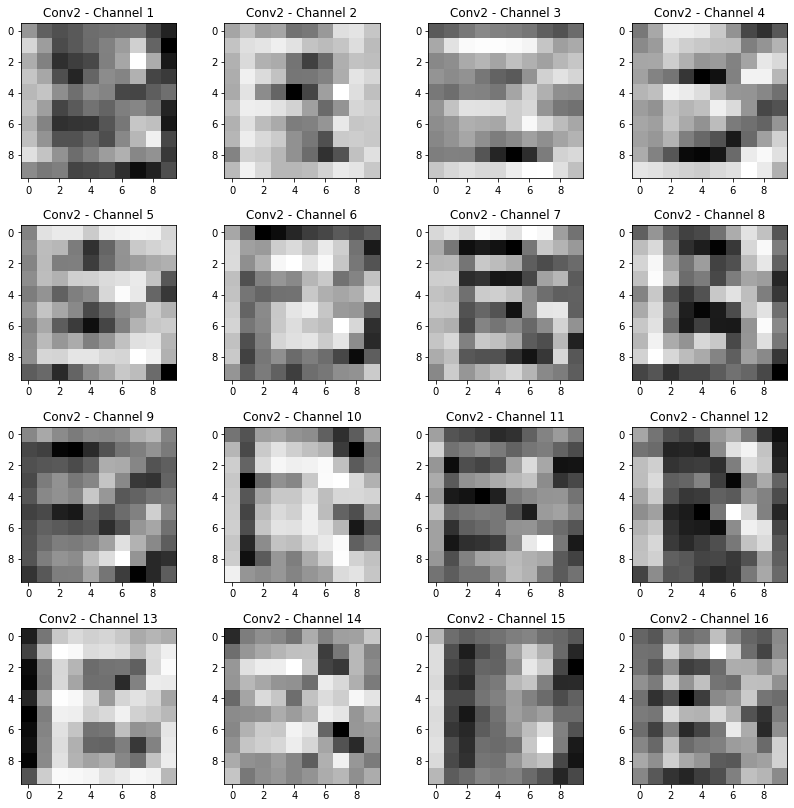

In [ ]:
fig,axes = plt.subplots(4, 4, figsize=(14, 14))
for i,x,y in zip(range(16),np.concatenate([([i]*4) for i in [0,1,2,3]], axis=0),list(range(4))*4):
    axes[x,y].imshow(convlayer2[2489,:,:,i], cmap='Greys', interpolation='nearest')
    axes[x,y].set_title(f'Conv2 - Channel {i+1}')
    plt.subplots_adjust(hspace=0.3)
plt.show()

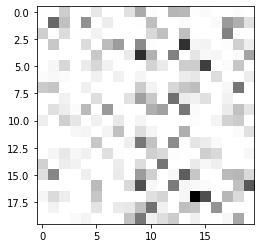

In [ ]:
flatten_layer_r = tf.reshape(flatten_layer,(4427,20,20))
plt.imshow(flatten_layer_r[2489], cmap='Greys', interpolation='nearest')
plt.show()

# Testing how HW2 MLP0 would perform in this dataset.

In [ ]:
# Creates the X and Y portions of each font
keep2 = list(range(3,403))
font1_X = font1.iloc[:,keep2].to_numpy()
font2_X = font2.iloc[:,keep2].to_numpy()
font3_X = font3.iloc[:,keep2].to_numpy()
font4_X = font4.iloc[:,keep2].to_numpy()
font5_X = font5.iloc[:,keep2].to_numpy()


# font4_X = font4[(font4['strength']==0.4) & (font4['italic']==0)]
# font5_X = font5[(font5['strength']==0.4) & (font5['italic']==0)]


# Standardizing the input layer.  (output layer does not get standardized)
# X = np.stack((font1_X, font2_X, font3_X))
X = np.vstack((font1_X, font2_X, font3_X, font4_X, font5_X))
X_scaled = StandardScaler().fit_transform(X)

# Separating the inputs after rescaling
n1 = font1.shape[0]
n2 = font2.shape[0]
n3 = font3.shape[0]
n4 = font4.shape[0]
n5 = font5.shape[0]
font1_X_scaled = X_scaled[0:n1,:]
font2_X_scaled = X_scaled[n1:(n1+n2),:]
font3_X_scaled = X_scaled[(n1+n2):(n1+n2+n3),:]
font4_X_scaled = X_scaled[(n1+n2+n3):(n1+n2+n3+n4),:]
font5_X_scaled = X_scaled[(n1+n2+n3+n4):,:]


# # Creating the TRAIN and TEST sets for each font
font1_Ytrain,font1_Ytest,font1_Xtrain,font1_Xtest = train_test_split(font1_Y,font1_X_scaled, train_size=0.8, random_state= 77)
font2_Ytrain,font2_Ytest,font2_Xtrain,font2_Xtest = train_test_split(font2_Y,font2_X_scaled, train_size=0.8, random_state= 77)
font3_Ytrain,font3_Ytest,font3_Xtrain,font3_Xtest = train_test_split(font3_Y,font3_X_scaled, train_size=0.8, random_state= 77)
font4_Ytrain,font4_Ytest,font4_Xtrain,font4_Xtest = train_test_split(font4_Y,font4_X_scaled, train_size=0.8, random_state= 77)
font5_Ytrain,font5_Ytest,font5_Xtrain,font5_Xtest = train_test_split(font5_Y,font5_X_scaled, train_size=0.8, random_state= 77)

# # Creating the final TRAIN and TEST sets
Xtrain = np.vstack((font1_Xtrain, font2_Xtrain, font3_Xtrain,font4_Xtrain,font5_Xtrain))
Xtest = np.vstack((font1_Xtest, font2_Xtest, font3_Xtest,font4_Xtest,font5_Xtest))
# Ytrain = np.concatenate((font1_Ytrain, font2_Ytrain, font3_Ytrain,font4_Ytrain,font5_Ytrain))
# Ytest = np.concatenate((font1_Ytest, font2_Ytest, font3_Ytest, font4_Ytrain, font5_Ytrain))
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(17702, 400)
(4427, 400)
(17702, 5)
(4427, 5)


In [ ]:
inputs = keras.Input(shape=(400,)) # 400-dimonsional vector and Batch size not specified since it can vary.
x1 = layers.Dense(90,activation="sigmoid")(inputs) # Giving this layer the inputs
outputs = layers.Dense(5, activation="softmax")(x1) # Output layer with 3 classes

model = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400)]             0         
_________________________________________________________________
dense_16 (Dense)             (None, 90)                36090     
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 455       
Total params: 36,545
Trainable params: 36,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss_fn = losses.CategoricalCrossentropy()
optimizer = optimizers.Adam() # LR 0.001 is the default
model.compile(optimizer=optimizer,loss=loss_fn, metrics=['accuracy'])

In [ ]:
start = time.process_time()
from tensorflow.keras import callbacks
# checkpoint=callbacks.ModelCheckpoint(filepath='BestModel.h100',monitor='val_accuracy',save_best_only=True)
Monitor = model.fit(Xtrain, Ytrain, epochs=100, batch_size=133, validation_data=(Xtest,Ytest))#, callbacks=[checkpoint])
model_h_time = (time.process_time() - start)
print(f"Time to run model: {model_h_time//60} minute {model_h_time%60} seconds")

Epoch 1/100
134/134 [==============================] - 1s 4ms/step - loss: 1.5535 - accuracy: 0.3348 - val_loss: 1.3630 - val_accuracy: 0.4538
Epoch 2/100
134/134 [==============================] - 0s 3ms/step - loss: 1.3227 - accuracy: 0.4702 - val_loss: 1.3030 - val_accuracy: 0.4802
Epoch 3/100
134/134 [==============================] - 0s 3ms/step - loss: 1.2588 - accuracy: 0.5056 - val_loss: 1.2563 - val_accuracy: 0.4994
Epoch 4/100
134/134 [==============================] - 0s 3ms/step - loss: 1.2006 - accuracy: 0.5412 - val_loss: 1.2119 - val_accuracy: 0.5250
Epoch 5/100
134/134 [==============================] - 0s 3ms/step - loss: 1.1466 - accuracy: 0.5648 - val_loss: 1.1775 - val_accuracy: 0.5482
Epoch 6/100
134/134 [==============================] - 0s 3ms/step - loss: 1.1023 - accuracy: 0.5910 - val_loss: 1.1318 - val_accuracy: 0.5701
Epoch 7/100
134/134 [==============================] - 0s 4ms/step - loss: 1.0459 - accuracy: 0.6172 - val_loss: 1.1004 - val_accuracy: 0.5774

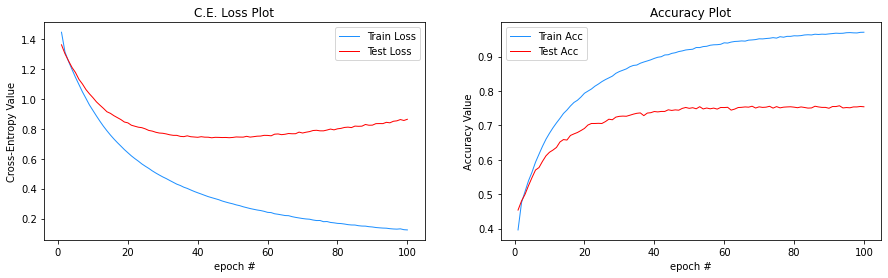

In [ ]:
plot_loss_and_acc(Monitor.history['loss'], Monitor.history['val_loss'],
                  Monitor.history['accuracy'], Monitor.history['val_accuracy'])

In [ ]:
inputs = keras.Input(shape=(400,)) # 400-dimonsional vector and Batch size not specified since it can vary.
x1 = layers.Dense(90,activation="sigmoid")(inputs) # Giving this layer the inputs
outputs = layers.Dense(5, activation="softmax")(x1) # Output layer with 3 classes

model = keras.Model(inputs=inputs,outputs=outputs)

loss_fn = losses.CategoricalCrossentropy()
optimizer = optimizers.Adam() # LR 0.001 is the default
model.compile(optimizer=optimizer,loss=loss_fn, metrics=['accuracy'])

In [ ]:
start = time.process_time()
from tensorflow.keras import callbacks
# checkpoint=callbacks.ModelCheckpoint(filepath='BestModel.h100',monitor='val_accuracy',save_best_only=True)
Monitor = model.fit(Xtrain, Ytrain, epochs=35, batch_size=133, validation_data=(Xtest,Ytest))#, callbacks=[checkpoint])
model_h_time = (time.process_time() - start)
print(f"Time to run model: {model_h_time//60} minute {model_h_time%60} seconds")

Epoch 1/35
134/134 [==============================] - 1s 6ms/step - loss: 1.4906 - accuracy: 0.3609 - val_loss: 1.3566 - val_accuracy: 0.4464
Epoch 2/35
134/134 [==============================] - 1s 4ms/step - loss: 1.3239 - accuracy: 0.4717 - val_loss: 1.2979 - val_accuracy: 0.4726
Epoch 3/35
134/134 [==============================] - 1s 4ms/step - loss: 1.2601 - accuracy: 0.5016 - val_loss: 1.2564 - val_accuracy: 0.4942
Epoch 4/35
134/134 [==============================] - 1s 5ms/step - loss: 1.2031 - accuracy: 0.5269 - val_loss: 1.2029 - val_accuracy: 0.5232
Epoch 5/35
134/134 [==============================] - 0s 3ms/step - loss: 1.1397 - accuracy: 0.5649 - val_loss: 1.1694 - val_accuracy: 0.5469
Epoch 6/35
134/134 [==============================] - 0s 3ms/step - loss: 1.0907 - accuracy: 0.5888 - val_loss: 1.1298 - val_accuracy: 0.5629
Epoch 7/35
134/134 [==============================] - 0s 3ms/step - loss: 1.0421 - accuracy: 0.6193 - val_loss: 1.0932 - val_accuracy: 0.5887
Epoch 

In [ ]:
model.evaluate(Xtest,Ytest)
y_pred_test = model.predict(Xtest)
predlabel_test = np.argmax(y_pred_test,axis=1)
Ytest_true= np.argmax(Ytest,axis=1)
classes = np.asarray(['1','2','3','4','5'])

cm= confusion_matrix(Ytest_true, predlabel_test); cm

139/139 [==============================] - 0s 1ms/step - loss: 0.7655 - accuracy: 0.7244


array([[620,  59,  72,  12,  90],
       [ 51, 666, 136,  36,  65],
       [ 67, 169, 411,  51,  61],
       [  8,  17,  60, 788,  27],
       [ 74,  48,  72,  45, 722]])

Normalized confusion matrix


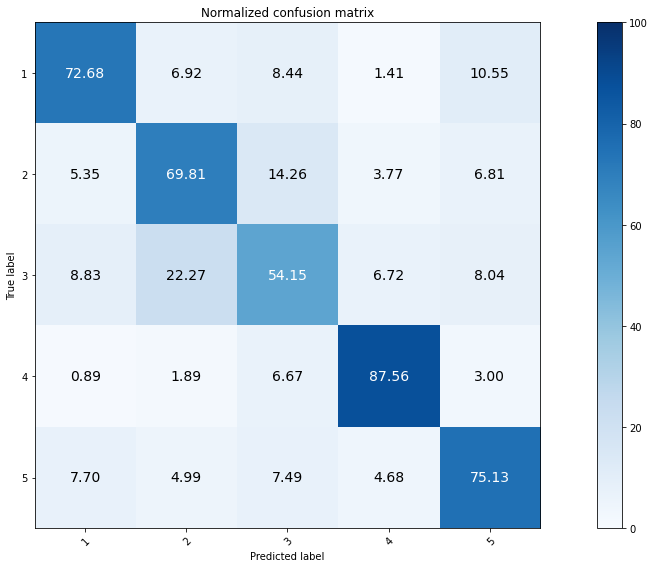

Global acc is: 72.442


In [ ]:
plot_confusion_matrix(Ytest_true, predlabel_test, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Global acc is:', round(accuracy_score(Ytest_true, predlabel_test)*100,3))

In [ ]:
HLA(my_cases = Xtrain, blurb="For All Classes:", model_to_use=model200['model'])

In [ ]:
Class_Responder(my_classes = (font1_Xtrain, font2_Xtrain, font3_Xtrain, font4_Xtrain, font5_Xtrain),
                    model = model200['model'],
                    layer_to_use = 9)

# Below this is kinda junk. Just old stuff

# Creating the model

In [ ]:
model = Sequential()
# Conv1
model.add(Conv2D(16, (5, 5), padding='valid', input_shape= Xtrain.shape[1:])) # Number of paramters = ((5x5)+1)*16
model.add(Activation('relu'))
# Maxpool1
model.add(MaxPooling2D(pool_size=(2, 2)))
# Conv2
model.add(Conv2D(16, (3, 3), padding='valid')) # Number of paramters = ((3x3)*16+1)*16
model.add(Activation('relu'))
# Maxpool2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten
model.add(Flatten())
# Hidden
model.add(Dense(90))
model.add(Activation('relu'))
# Output
model.add(Dense(5))

model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_76 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_77 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 144)             

Azencott said he thinks Adam is a better optimizer than SGD fyi

In [ ]:
#from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001, decay=1e-7) #

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
#from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='/content/model_1', monitor='val_accuracy', save_best_only=True)

In [ ]:
batch = round((Xtrain.shape[0])**0.5)
print(batch)

133


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%%time
with tf.device('/gpu:0'):
  Monitor = model.fit(Xtrain, Ytrain,
                batch_size=133,
                epochs=5,
                validation_data=(Xtest, Ytest),
                # callbacks = [checkpointer],
                shuffle = True)

#cpu 1 min 58 sec on 20 epochs
#gpu only 14 sec on 20 epochs. Holy smokes.

Epoch 1/5
134/134 [==============================] - 1s 5ms/step - loss: 1.5701 - accuracy: 0.2833 - val_loss: 1.4179 - val_accuracy: 0.4007
Epoch 2/5
134/134 [==============================] - 0s 4ms/step - loss: 1.3645 - accuracy: 0.4311 - val_loss: 1.2979 - val_accuracy: 0.4617
Epoch 3/5
134/134 [==============================] - 1s 4ms/step - loss: 1.2555 - accuracy: 0.4848 - val_loss: 1.2438 - val_accuracy: 0.4958
Epoch 4/5
134/134 [==============================] - 1s 4ms/step - loss: 1.1938 - accuracy: 0.5169 - val_loss: 1.1931 - val_accuracy: 0.5216
Epoch 5/5
134/134 [==============================] - 0s 4ms/step - loss: 1.1420 - accuracy: 0.5455 - val_loss: 1.1976 - val_accuracy: 0.5168
CPU times: user 3.46 s, sys: 308 ms, total: 3.76 s
Wall time: 3.14 s


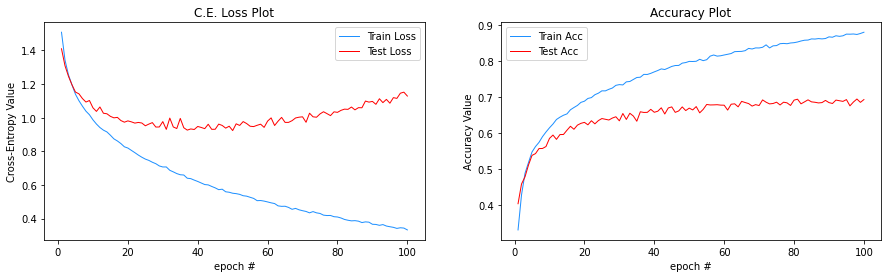

In [ ]:
plot_loss_and_acc(Monitor.history['loss'], Monitor.history['val_loss'],
                  Monitor.history['accuracy'], Monitor.history['val_accuracy'])

In [ ]:
#from tensorflow.keras.models import load_model
trained_model = load_model('weights.model_1')

OSError: ignored

# Creating the model with Dropout layer



In [ ]:
model = Sequential()
# Conv1
model.add(Conv2D(16, (5, 5), padding='valid', input_shape= Xtrain.shape[1:])) # Number of paramters = ((5x5)+1)*16
model.add(Activation('relu'))
# Maxpool1
model.add(MaxPooling2D(pool_size=(2, 2)))
# Conv2
model.add(Conv2D(16, (3, 3), padding='valid')) # Number of paramters = ((3x3)*16+1)*16
model.add(Activation('relu'))
# Maxpool2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten
model.add(Flatten())
# Hidden
model.add(Dense(90))
model.add(Dropout(0.5)) # Dropout Layer
model.add(Activation('relu'))
# Output
model.add(Dense(5))

model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 16, 16, 16)        416       
_________________________________________________________________
activation_28 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
activation_29 (Activation)   (None, 6, 6, 16)          0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 144)              

In [ ]:
#from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001, decay=1e-7)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
%%time
Monitor = model.fit(Xtrain, Ytrain,
              batch_size=batch,
              epochs=100,
              validation_data=(Xtest, Ytest),
              # callbacks = [checkpointer],
              shuffle = True)

Epoch 1/100
134/134 [==============================] - 1s 5ms/step - loss: 1.5825 - accuracy: 0.2585 - val_loss: 1.4353 - val_accuracy: 0.3885
Epoch 2/100
134/134 [==============================] - 1s 4ms/step - loss: 1.4209 - accuracy: 0.3923 - val_loss: 1.3252 - val_accuracy: 0.4457
Epoch 3/100
134/134 [==============================] - 1s 4ms/step - loss: 1.3344 - accuracy: 0.4420 - val_loss: 1.2755 - val_accuracy: 0.4793
Epoch 4/100
134/134 [==============================] - 1s 4ms/step - loss: 1.2526 - accuracy: 0.4833 - val_loss: 1.2311 - val_accuracy: 0.4927
Epoch 5/100
134/134 [==============================] - 0s 4ms/step - loss: 1.2350 - accuracy: 0.4933 - val_loss: 1.1748 - val_accuracy: 0.5148
Epoch 6/100
134/134 [==============================] - 0s 4ms/step - loss: 1.1848 - accuracy: 0.5193 - val_loss: 1.1509 - val_accuracy: 0.5340
Epoch 7/100
134/134 [==============================] - 0s 4ms/step - loss: 1.1591 - accuracy: 0.5353 - val_loss: 1.1449 - val_accuracy: 0.5412

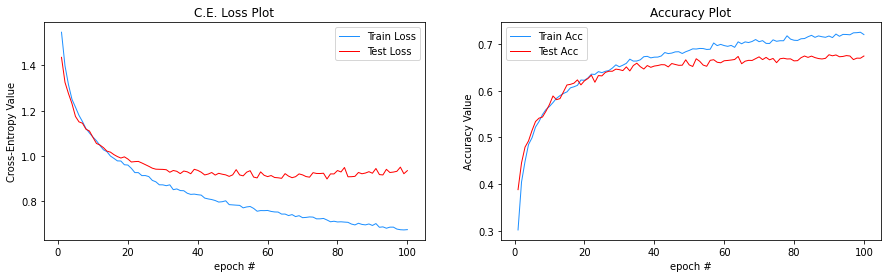

In [ ]:
plot_loss_and_acc(Monitor.history['loss'], Monitor.history['val_loss'],
                  Monitor.history['accuracy'], Monitor.history['val_accuracy'])